### <p style="text-align: center;">Practical 11</p>
#### <p style="text-align: center;">Implementation of Support Vector Machine Classifier(SVM) </p>

##### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import pprint
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('datasets/Lab 11 ML Dataset - SVM.xlsx')

In [3]:
data.head(6)

,Unnamed: 0,training data,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,Sl.No.,X1,X2,Class
2,1,3,1,1
3,2,3,-1,1
4,3,6,1,1
5,4,6,-1,1


##### Importing Dataset

In [4]:
df = data.iloc[2:10,1:]
df.columns = ['X1','X2','Class']
df.reset_index(drop = True,inplace = True)
df.head(10)

,X1,X2,Class
0,3,1,1
1,3,-1,1
2,6,1,1
3,6,-1,1
4,1,0,-1
5,0,1,-1
6,0,-1,-1
7,-1,0,-1


##### Defining functions

In [5]:
def plot_classes(data,w):
  plt.figure(figsize=(5,3))  
  inputs = df.iloc[:,:-1]
  target = df.iloc[:,-1]
  for i in range(len(data)):
    if(target[i]==1):
      plt.scatter(inputs['X1'][i],inputs['X2'][i],marker='+',c='r')
    else:
      plt.scatter(inputs['X1'][i],inputs['X2'][i],marker='o',c='b')
  if(len(w)!=0):
    b = w[2]
    x_coordinate = -b/w[0]
    plt.axvline(x=x_coordinate, color='red', linestyle='--')
    # plt.plot([-1*w[2],0],[0,0])
  plt.show()

In [6]:
def SVM(data):

  w = []
  # Step 1 : Plot The graph
  plot_classes(data,w)

  # Step 2 : Assume Support Vectors From Each Class (Take Inputs) & Also take input for their class
#   s = [[1, 0], [3, 1], [3, -1]]
#   vector_class = [-1,1,1]

  s = []
  vector_class = []

  for i in range(3):
    temp_vector = list(map(int,input(f"Enter Support Vector {i+1}: ").strip().split()))
    s.append(temp_vector)
    vector_class.append(int(input(f"Enter the class to which Vector {i+1} belongs :")))

  # Step 3 : Augment Each Support Vector with bias +1
  for i in range(3):
    s[i].append(1)

  # Step 4 : Find α1,α2,α3

  A = [[np.dot(s[0],s[0]),np.dot(s[1],s[0]),np.dot(s[2],s[0])],
       [np.dot(s[0],s[1]),np.dot(s[1],s[1]),np.dot(s[2],s[1])],
       [np.dot(s[0],s[2]),np.dot(s[1],s[2]),np.dot(s[2],s[2])]]

  b = vector_class
  alpha = np.linalg.solve(A,b)

  # Step 5 : Calculate final W
  for i in range(3):
    w.append(np.dot(alpha[i],s[i]))
  w = sum(w)
#   print(f"\nWeight :{w[:-1]} \nBias : {w[2]}\n")
  plot_classes(data,w)
  return w[:-1],w[2]


In [14]:
def SVM_classify(weight,bias,inputs):
    y = np.dot(weight,inputs)
    y = y - bias
    if(y>=1):
        print("Predicted Class : Positive")
    elif(y<=-1):
        print("Predicted Class : Negative")
    else:
        print("The new datapoint lies on the Hyperplane")

##### Drawing support vector and classifying new input

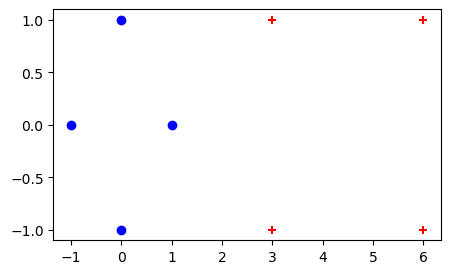

Enter Support Vector 1: 1 0
Enter the class to which Vector 1 belongs :-1
Enter Support Vector 2: 3 1
Enter the class to which Vector 2 belongs :1
Enter Support Vector 3: 3 -1
Enter the class to which Vector 3 belongs :1


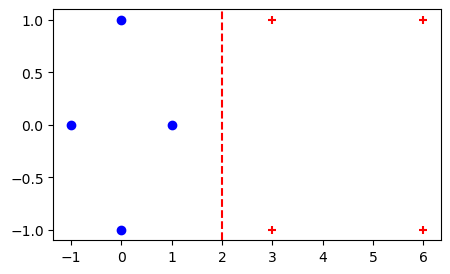


Weight :[1. 0.] 
Bias : -2.0



In [8]:
w,b = SVM(df)
print(f"\nWeight :{w} \nBias : {b}\n")

In [15]:
SVM_classify(w,b,[2,-2])

Predicted Class : Positive
